In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
#Direct

def du2_dphi2(a, b, u):
    # 计算括号内的各项之和
    term1 = 2 * a**5 * u**4 * (5 * u + 2)
    term2 = 3 * a**4 * b * u**3 * (-10 * u**2 + u + 1)
    term3 = 2 * a**3 * u**2 * (
        15 * b**2 * u**3
        - 3 * (3 * b**2 + 2) * u**2
        - u
        + 1
    )
    term4 = a**2 * b * u * (
        -10 * b**2 * u**4
        + (11 * b**2 + 36) * u**3
        - 3 * (b**2 + 4) * u**2
        - 3 * u
        + 3
    )
    term5 = -2 * a * (
        3 * b**2 * (6 * u**2 - 5 * u + 1) * u**2
        + 1
    )
    term6 = b**3 * (1 - 2 * u)**2 * u * (3 * u - 1)
    
    # 括号内总和
    inner_sum = term1 + term2 + term3 + term4 + term5 + term6
    
    # 最终结果
    result = (a**2 * u**2 - 2 * u + 1) * inner_sum * (-1)/(b*(2*u-1)-2*a*u)**3
    return result
#Retro

def du2_dphi2a(a, b, u):
    # 计算分子中的各个项
    term1 = 2 * a**5 * u**4 * (5 * u + 2)
    term2 = 3 * a**4 * b * u**3 * (10 * u**2 - u - 1)
    term3 = 2 * a**3 * u**2 * (
        15 * b**2 * u**3
        - 3 * (3 * b**2 + 2) * u**2
        - u
        + 1
    )
    term4 = a**2 * b * u * (
        10 * b**2 * u**4
        - (11 * b**2 + 36) * u**3
        + 3 * (b**2 + 4) * u**2
        + 3 * u
        - 3
    )
    term5 = -2 * a * (
        3 * b**2 * (6 * u**2 - 5 * u + 1) * u**2
        + 1
    )
    term6 = -b**3 * (1 - 2 * u)**2 * u * (3 * u - 1)
    
    # 分子部分的总和
    inner_sum = term1 + term2 + term3 + term4 + term5 + term6
    numerator = 2 * (a**2 * u**2 - 2 * u + 1) * inner_sum
    
    # 分母部分
    denominator = (2 * a * u + b * (2 * u - 1))**3
    
    # 最终结果
    return (1/2)*numerator / denominator

In [3]:
#Direct
def solve_orbit(phi, y, a, b):
    u, u_prime = y[0: 2]
    
    du_dphi = u_prime
    du2dphi2 = du2_dphi2(a, b, u)

    return [du_dphi, du2dphi2]

def ini_condition(u, a, b):
    A_u = (1-2*u+a**2*u**2)**2/(1-2*u*(1-a/b))**2
    B_u = 2*u**3*(1-a/b)**2-u**2*(1-a**2/b**2)+1/b**2

    return [u, np.sqrt(A_u*B_u)]

#Retro
def solve_orbita(phi, y, a, b):
    u, u_prime = y[0: 2]
    
    du_dphi = u_prime
    du2dphi2 = du2_dphi2a(a, b, u)

    return [du_dphi, du2dphi2]

def ini_conditiona(u, a, b):
    A_u = (1-2*u+a**2*u**2)**2/(1-2*u*(1+a/b))**2
    B_u = 2*u**3*(1+a/b)**2-u**2*(1-a**2/b**2)+1/b**2

    return [u, np.sqrt(A_u*B_u)]

In [4]:
a = 0.9
b_prime = 0.2

b_sc_direct = -a+6*np.cos((1/3)*np.arccos(-a))
b_sc_retro = -a-6*np.cos((1/3)*np.arccos(a))
b_direct = b_sc_direct/(1-b_prime)
b_retro = -b_sc_retro/(1-b_prime)

r_ini = 50
u_ini = 1/r_ini
phi_end = np.pi/1.2
phi_rng = [np.arcsin(b_direct/r_ini), phi_end]
phi_rnga = [np.arcsin(b_retro/r_ini), phi_end]
y_ini = ini_condition(u_ini, a, b_direct)
y_inia = ini_conditiona(u_ini, a, b_retro)
print(b_direct, b_retro)

3.5555267543452116 8.540399038058334


In [5]:
sol = solve_ivp(solve_orbit, phi_rng, y_ini, args=(a, b_direct), dense_output=True, atol=1e-9, rtol=1e-7)

sola = solve_ivp(solve_orbita, phi_rnga, y_inia, args=(a, b_retro), dense_output=True, atol=1e-9, rtol=1e-7)

In [6]:
phi_list = np.linspace(phi_rng[0], phi_rng[-1], 1000)
phi_lista = np.linspace(phi_rnga[0], phi_rnga[-1], 1000)

In [7]:
u_list = sol.sol(phi_list)[0]
r_list = 1/u_list
x_list = r_list*np.cos(phi_list)
y_list = r_list*np.sin(phi_list)

u_lista = sola.sol(phi_lista)[0]
r_lista = 1/u_lista
x_lista = r_lista*np.cos(phi_lista)
y_lista = r_lista*np.sin(phi_lista)

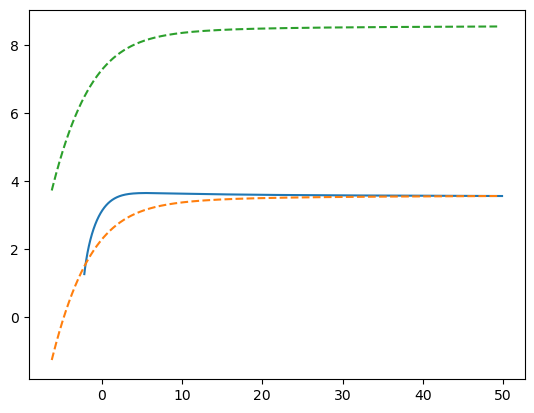

In [8]:
plt.plot(x_list, y_list)
plt.plot(x_lista, y_lista-(b_retro-b_direct), linestyle='--')
plt.plot(x_lista, y_lista, linestyle='--')
plt.show()

In [9]:
def b_sc(s, a):
    return -a+6*s*np.cos((1/3)*np.arccos(-s*a))

In [10]:
a_list = np.linspace(0, 1, 1000)

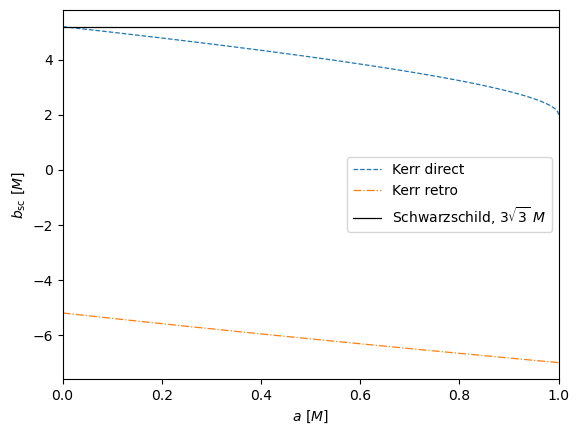

In [11]:
plt.plot(a_list, b_sc(1, a_list), lw = 0.9, linestyle = '--', label='Kerr direct')
plt.plot(a_list, b_sc(-1, a_list), lw = 0.9, linestyle = '-.', label='Kerr retro')
plt.axhline(y=3*np.sqrt(3), lw = 0.9, color = 'black', label=r'Schwarzschild, $3\sqrt{3}\ M$')
plt.legend()
plt.xlabel(r'$a\ [M]$')
plt.ylabel(r'$b_{\rm sc}\ [M]$')
plt.xlim(0, 1)
plt.show()